In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/DELL G15/Desktop/kaggle/pet products/pet_supplies.csv")

In [3]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


checking for columns types

In [4]:
df.isnull().sum()

product_id           0
category             0
animal               0
size                 0
price                0
sales                0
rating             150
repeat_purchase      0
dtype: int64

checking null values count

In [5]:
df.dtypes

product_id           int64
category            object
animal              object
size                object
price               object
sales              float64
rating             float64
repeat_purchase      int64
dtype: object

In [6]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


# Preprocessing and cleaning data column by column

### product_id

In [7]:
df['product_id']=df['product_id'].astype('object')

### category

checking for missing values first

In [8]:
#df[~(df['category'].isin(['Housing','Food','Toys','Equipment','Medicine','Accessory']))]
df[~(df['category'].isin(['Housing','Food','Toys','Equipment','Medicine','Accessory']))].shape

(25, 8)

replacing missing values with "unknown"

In [9]:
df['category']=df['category'].str.replace('-','Unknown')

### Animal

Checking for missing values

In [10]:
df[~(df['animal'].isin(['Dog','Cat','Fish','Bird']))]\
       .shape
#Nothing to change

(0, 8)

### Size

Checking for missing values

In [11]:
df[~(df['size'].isin(['Small','Medium','Large']))]

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
7,8,Toys,Cat,medium,28.9,1074.31,4.0,0
...,...,...,...,...,...,...,...,...
1492,1493,Medicine,Cat,SMALL,24.95,993.08,7.0,1
1493,1494,Housing,Fish,small,21,535.90,3.0,1
1495,1496,Food,Bird,medium,40.91,1203.36,5.0,0
1496,1497,Equipment,Dog,small,32.89,1099.97,5.0,0


it seems that these aren't missing values, but rather these values simply don't have the same capitalization. We run the test again

In [12]:
#df[~(df['size'].str.lower().isin(['small','medium','large']))]
df[~(df['size'].str.lower().isin(['small','medium','large']))].shape
#No missing values

(0, 8)

In [13]:
df['size']= df['size'].str.title()

In [14]:
#making the column into ordinal order
category_order = ['Small', 'Medium', 'Large']
df['size'] = pd.Categorical(df['size'], categories=category_order, ordered=True)

In [15]:
df.dtypes

product_id           object
category             object
animal               object
size               category
price                object
sales               float64
rating              float64
repeat_purchase       int64
dtype: object

### Price

In [16]:
#current type is object. Attempt to convert directly to float. If missing values exist, we check the error and that's how we detect the missing values
#df['price'].astype(float)
#df[df['price'].str.lower()=='unlisted']
df[df['price'].str.lower()=='unlisted'].shape

(150, 8)

In [17]:
#computing the median and replacing missing values with median
median=df[df['price'].str.lower()!='unlisted']['price'].median()
df['price']=df['price'].str.replace('unlisted',str(median))

In [18]:
df['price']=df['price'].astype(float)

In [19]:
#rounding
df['price'] = df['price'].round(2)

### Sales

In [20]:
#current type is the correct type 
#df[df['sales']<0] checking for negative values
#rounding
df['sales'] = df['sales'].round(2)

### Rating

In [21]:
#checking for null values
#df[df['rating'].isnull()]
df[df['rating'].isnull()].shape

(150, 8)

In [22]:
#replacing null values
df['rating'].fillna(0, inplace=True)

In [23]:
#discrete values, so we convert them to integer
df['rating']= df['rating'].astype(int)

### Repeat_purchase

In [24]:
df.dtypes

product_id           object
category             object
animal               object
size               category
price               float64
sales               float64
rating                int32
repeat_purchase       int64
dtype: object

In [25]:
df['repeat_purchase'].value_counts()
#no null values. We proceed to simply convert it to object (nominal)
df['repeat_purchase']= df['repeat_purchase'].astype(object)

In [26]:
df.dtypes

product_id           object
category             object
animal               object
size               category
price               float64
sales               float64
rating                int32
repeat_purchase      object
dtype: object

# Visualizations

### Ex 2:  
## question 1

In [27]:
df.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,Large,51.10,1860.62,7,1
1,2,Housing,Bird,Medium,35.98,963.60,6,0
2,3,Food,Dog,Medium,31.23,898.30,5,1
3,4,Medicine,Cat,Small,24.95,982.15,6,1
4,5,Housing,Cat,Small,26.18,832.63,7,1


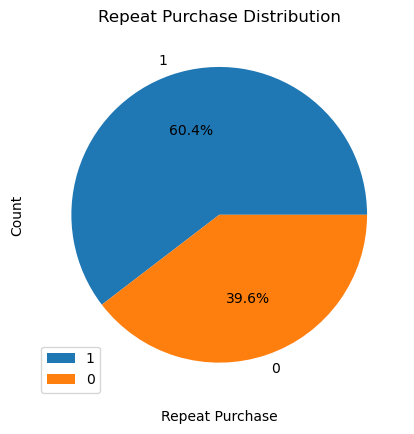

In [28]:
repeat_purchase_counts = df['repeat_purchase'].value_counts()
plt.pie(repeat_purchase_counts, labels=repeat_purchase_counts.index, autopct='%1.1f%%')
plt.xlabel('Repeat Purchase')
plt.ylabel('Count')
plt.title('Repeat Purchase Distribution')
plt.legend()
plt.show()

question 2:  
It seems that more products are repeatedly purchased.  
We can observe that 60% of them being purchased again against 39.6% not being repurchased.

Ex:3  
The median of the sales is around $1,000. The 25th and 75th percentile, respectively around $750 and $1,150.  
Although, there seems to be few outliers; one of them being the maximum sale amount of $2,256.  
But, for the most part, the sales are ranging from 750 and $1,150 (IQR). 

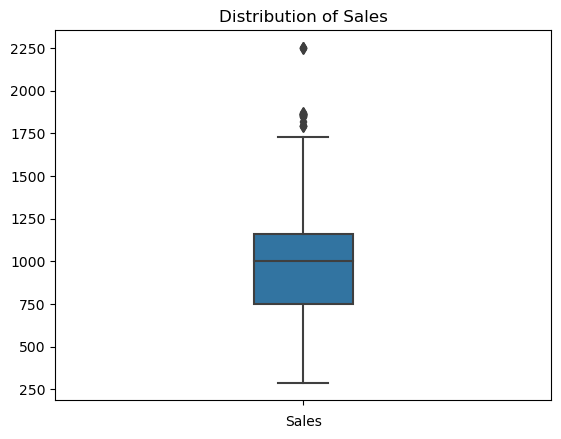

In [29]:
sns.boxplot(data=df, y='sales', width= 0.2)
plt.xlabel('Sales')
plt.ylabel('')  # Remove y-axis label
plt.title('Distribution of Sales')
plt.show()

In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1500.0,29.287873,7.335833,12.85,25.00,28.06,33.1425,54.16
sales,1500.0,996.597847,323.952676,286.94,747.42,1000.83,1158.1575,2255.96
rating,1500.0,4.492000,2.105443,0.00,3.00,5.00,6.0000,9.00


Ex4  
As the barplot indicates, the total sales revenue are higher for the category of items being repurchased.
The following figure of boxplots shows that it's mainly the outliers of higher values that drive the aggregated sales value for category(1) to be higher than that of category(2).

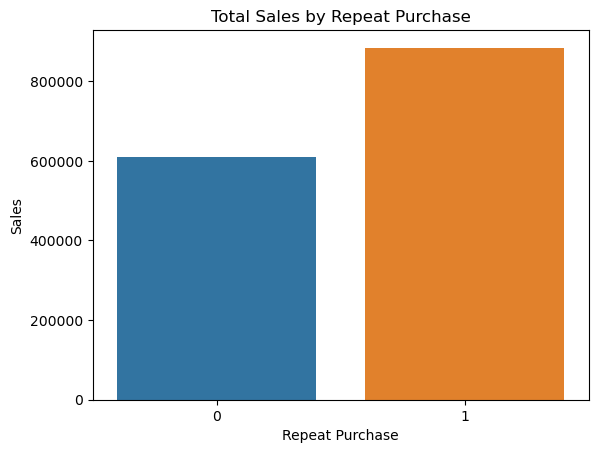

In [31]:
grouped_df = df[['sales', 'repeat_purchase']].groupby('repeat_purchase')['sales'].sum().reset_index()

sns.barplot(data=grouped_df, x='repeat_purchase', y='sales')
plt.xlabel('Repeat Purchase')
plt.ylabel('Sales')
plt.title('Total Sales by Repeat Purchase')
plt.show()

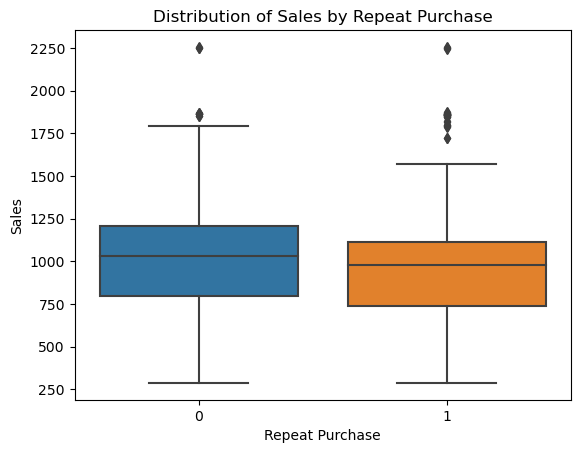

In [32]:
sns.boxplot(x='repeat_purchase', y='sales', data=df)
plt.xlabel('Repeat Purchase')
plt.ylabel('Sales')
plt.title('Distribution of Sales by Repeat Purchase')
plt.show()